In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
fedFunds = read.csv('data/federalFundsRate.csv.xz', stringsAsFactors=F)

In [4]:
summary(fedFunds)
str(fedFunds)

     Date             Chairman          PreviousRate        Streak       
 Length:585         Length:585         Min.   : 0.070   Min.   :-16.000  
 Class :character   Class :character   1st Qu.: 3.290   1st Qu.: -2.000  
 Mode  :character   Mode  :character   Median : 5.390   Median :  1.000  
                                       Mean   : 5.651   Mean   :  1.094  
                                       3rd Qu.: 7.880   3rd Qu.:  3.000  
                                       Max.   :19.100   Max.   : 27.000  
      GDP         Unemployment         CPI         HomeownershipRate
 Min.   : 4202   Min.   : 3.400   Min.   : 31.88   Min.   :63.20    
 1st Qu.: 6039   1st Qu.: 5.000   1st Qu.: 63.40   1st Qu.:64.20    
 Median : 8907   Median : 5.900   Median :129.10   Median :64.80    
 Mean   : 9450   Mean   : 6.181   Mean   :127.71   Mean   :65.41    
 3rd Qu.:12956   3rd Qu.: 7.300   3rd Qu.:180.00   3rd Qu.:66.50    
 Max.   :16206   Max.   :10.800   Max.   :237.63   Max.   :69.20    

'data.frame':	585 obs. of  12 variables:
 $ Date               : chr  "1966-02-01" "1966-03-01" "1966-04-01" "1966-05-01" ...
 $ Chairman           : chr  "Martin, William M." "Martin, William M." "Martin, William M." "Martin, William M." ...
 $ PreviousRate       : num  4.42 4.6 4.65 4.67 4.9 5.17 5.3 5.53 5.4 5.53 ...
 $ Streak             : int  4 5 6 7 8 9 10 11 -1 1 ...
 $ GDP                : num  4202 4202 4202 4219 4219 ...
 $ Unemployment       : num  4 3.8 3.8 3.8 3.9 3.8 3.8 3.8 3.7 3.7 ...
 $ CPI                : num  31.9 32.1 32.2 32.3 32.4 ...
 $ HomeownershipRate  : num  63.5 63.5 63.5 63.2 63.2 63.2 63.3 63.3 63.3 63.8 ...
 $ DebtAsPctGDP       : num  40.3 4201.9 4201.9 39.2 4219.1 ...
 $ DemocraticPres     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MonthsUntilElection: int  33 32 31 30 29 28 27 26 25 24 ...
 $ RaisedFedFunds     : int  1 1 1 1 1 1 1 0 1 1 ...


In [7]:
prop.table(table(fedFunds$RaisedFedFunds))


        0         1 
0.4974359 0.5025641 

In [11]:
table(fedFunds$Chairman)


     Bernanke, Ben      Burns, Arthur    Greenspan, Alan Martin, William M. 
                96                 96                221                 48 
Miller, G. William                N/A      Volcker, Paul      Yellen, Janet 
                17                  2                 96                  9 

In [12]:
fedFunds$Chairman = as.factor(fedFunds$Chairman)
fedFunds$DemocraticPres = as.factor(fedFunds$DemocraticPres)
fedFunds$RaisedFedFunds = as.factor(fedFunds$RaisedFedFunds)

In [14]:
set.seed(201)
library(caTools)
spl = sample.split(fedFunds$RaisedFedFunds, 0.7)
train = subset(fedFunds, spl==T)
test = subset(fedFunds, spl==F)

In [17]:
model = glm(RaisedFedFunds ~ PreviousRate + Streak + Unemployment +
            HomeownershipRate + DemocraticPres + MonthsUntilElection,
            data=train, family='binomial')
summary(model)


Call:
glm(formula = RaisedFedFunds ~ PreviousRate + Streak + Unemployment + 
    HomeownershipRate + DemocraticPres + MonthsUntilElection, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8177  -1.0121   0.2301   1.0491   2.5297  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          9.121012   5.155774   1.769   0.0769 .  
PreviousRate        -0.003427   0.032350  -0.106   0.9156    
Streak               0.157658   0.025147   6.270 3.62e-10 ***
Unemployment        -0.047449   0.065438  -0.725   0.4684    
HomeownershipRate   -0.136451   0.076872  -1.775   0.0759 .  
DemocraticPres1      0.347829   0.233200   1.492   0.1358    
MonthsUntilElection -0.006931   0.007678  -0.903   0.3666    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 568.37  on 409  degrees of freedom
Residual devian

In [25]:
#9.121012 + 0.157658 * (-3) -0.003427 * 1.7 -0.047449 * 5.1 -0.136451 * 65.3 +
#    0.347829 * 0 -0.006931 * 18

In [27]:
single = train[1,]
single
single$Streak = -3
single$PreviousRate = 1.7
single$Unemployment = 5.1
single$HomeownershipRate = 65.3
single$DemocraticPres = 0
single$DemocraticPres = as.factor(single$DemocraticPres)
single$MonthsUntilElection = 18
predict(model, type='response', newdata = single)

,Date,Chairman,PreviousRate,Streak,GDP,Unemployment,CPI,HomeownershipRate,DebtAsPctGDP,DemocraticPres,MonthsUntilElection,RaisedFedFunds
1,1966-02-01,"Martin, William M.",4.42,4,4201.891,4,31.88,63.5,40.26076,1,33,1


1 
0.3464297

In [31]:
pred = predict(model, type='response', newdata=test)
table(test$RaisedFedFunds, pred > 0.5)
table(test$RaisedFedFunds)

   
    FALSE TRUE
  0    60   27
  1    31   57


 0  1 
87 88 

In [32]:
60+31

[1] 91

In [36]:
library(ROCR)
ROCRpred = prediction(pred, test$RaisedFedFunds)
as.numeric(performance(ROCRpred, 'auc')@y.values)
# The AUC is the proportion of time the model can differentiate
# between a randomly selected true positive and true negative.

[1] 0.704023

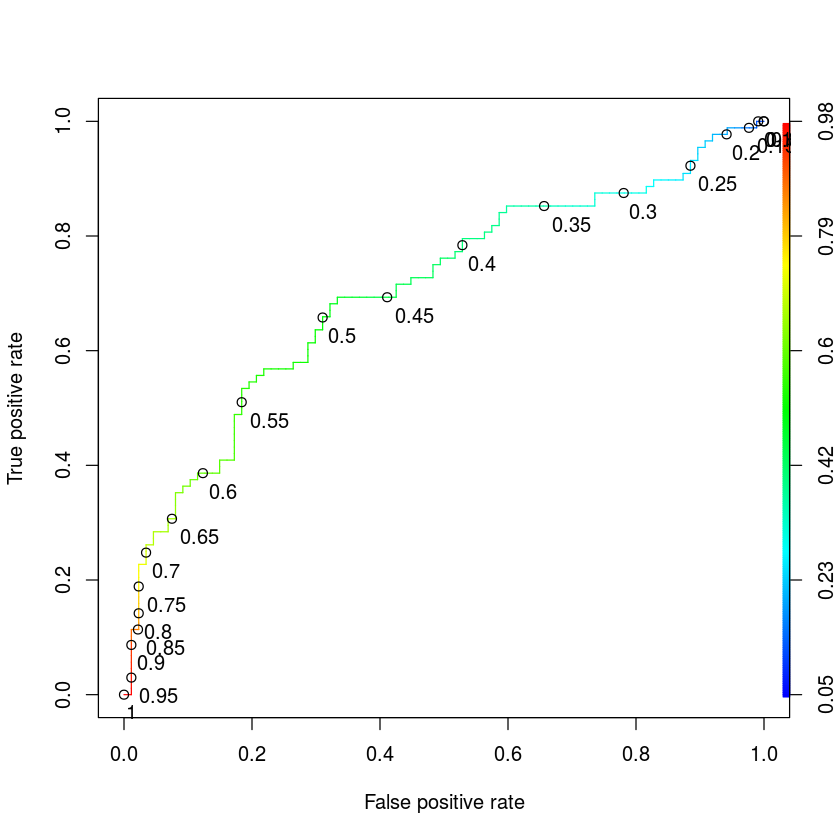

In [39]:
ROCRperf = performance(ROCRpred, 'tpr', 'fpr')
#plot(ROCRperf, colorize=T)
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.05), text.adj=c(-0.2,1.7))

In [41]:
set.seed(201)
library(caret)
library(e1071)
library(rpart)
library(rpart.plot)

In [43]:
numFolds = trainControl(method='cv', number=10)
cpGrid = expand.grid(.cp=seq(0.001, 0.05, length.out = 50))
train(RaisedFedFunds ~ PreviousRate + Streak + Unemployment +
      HomeownershipRate + DemocraticPres + MonthsUntilElection,
      data=train, method='rpart', trControl=numFolds, tuneGrid=cpGrid)

CART 

410 samples
 11 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 368, 368, 368, 370, 369, 369, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.001  0.6221312  0.2448321
  0.002  0.6221312  0.2448321
  0.003  0.6365331  0.2734338
  0.004  0.6340331  0.2684338
  0.005  0.6340331  0.2684338
  0.006  0.6487921  0.2980610
  0.007  0.6487921  0.2980610
  0.008  0.6487921  0.2980610
  0.009  0.6537311  0.3080170
  0.010  0.6537311  0.3080170
  0.011  0.6583101  0.3173385
  0.012  0.6583101  0.3173385
  0.013  0.6583101  0.3173385
  0.014  0.6632491  0.3272594
  0.015  0.6632491  0.3272594
  0.016  0.6632491  0.3272594
  0.017  0.6609901  0.3231241
  0.018  0.6609901  0.3231241
  0.019  0.6609901  0.3231241
  0.020  0.6560511  0.3137948
  0.021  0.6512892  0.3042710
  0.022  0.6437892  0.2892710
  0.023  0.6437892  0.2892710
  0.024  0.6583130  0.3183186
  0.025  0.6583130  0.3183186


In [44]:
tree = rpart(RaisedFedFunds ~ PreviousRate + Streak + Unemployment +
             HomeownershipRate + DemocraticPres + MonthsUntilElection,
             data=train, method='class', cp=0.016)

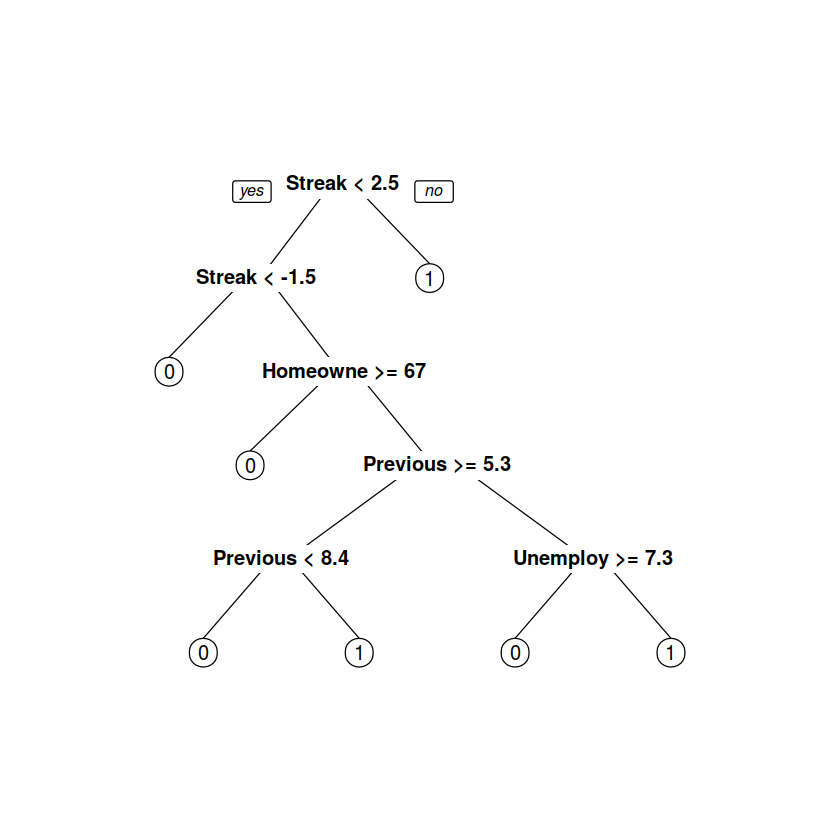

In [47]:
#rpart.plot(tree)
prp(tree)

In [50]:
predCV = predict(tree, newdata = test, type='class')
t = table(test$RaisedFedFunds, predCV)
t
sum(diag(t))/sum(t)

   predCV
     0  1
  0 64 23
  1 40 48

[1] 0.64